# Causal Inference Task.
# G's Growers KTP / University of Essex.
# April/May 2021.
# David Brookes.


In [1]:
# Import useful libraries.
# Numpy for multi-dimensional arrays and mathematical functions.
# Pandas for data analysis, manipulation and visualisation.
# Matplotlib and Seaborn for visualisation.
# Sklearn for machine learning routines.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
# Set random number seed, for reproducibility.

np.random.seed(321)

# Part 1.

# Read in the Infant Health Development Program (IHDP) dataset.

In [3]:
# The dataset in .csv format is saved as a pandas DataFrame.

# Note: 'r' allows backslashes (and forward slashes) in the file path name.
df_ihdp = pd.read_csv(r'D:\My Documents\Jobs Folder\Jobs 2020\Essex KTP Ana2\Task/ihdp_npci_repl532.csv')

print(df_ihdp.head())

         x1        x2        x3        x4        x5        x6   x7   x8   x9  \
0 -0.158967 -2.201766 -0.733261 -0.879606 -0.379120 -0.857787  1.0  0.0  1.0   
1 -1.045229 -1.337276  1.128554 -0.879606  0.683672  0.301522  1.0  0.0  1.0   
2 -0.785835 -0.602710  0.011465  0.161703  0.371086 -1.189018  0.0  0.0  0.0   
3 -0.245431 -0.202946  0.011465  1.203011  0.058500 -0.526556  0.0  1.0  1.0   
4 -1.875288 -1.802002  1.873280  1.203011  0.058500  0.963985  1.0  0.0  0.0   

   x10  ...  x18  x19  x20  x21  x22  x23  x24  x25    t   outcome  
0  1.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.976909  
1  0.0  ...  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.455608  
2  1.0  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  5.344970  
3  1.0  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  7.024344  
4  0.0  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  6.126817  

[5 rows x 27 columns]


# Part 2.


# Machine Learning Algorithms - Pros and Cons.

__Linear Regression__   \
Pros:   \
The model is simple in that predictions of the response variable are linear combinations   \
of the predictor variables. More complex models can be produced by incorporating new predictor   \
variables that are related to the current ones (through products and powers).   \
The coefficients of the model may be used to gauge the importance of the the variables associated  \
with them (if all the predictor variables have been standardised. Note that standardisation   \
does not affect predictions).   \
Cons:   \
The simple model may underfit the data.   \
Introducing more variables using polynomial regression, as just mentioned, can produce an explosion   \
in the number of features

__Decision Tree__   \
Pros:   \
The decison tree is a simple concept which is easy to interpret.   \
Cons:   \
Not as good as many of the other regression methods for prediction (e.g. ridge regression and polynomial regression).   

__Random Forest__   \
Pros:   \
The disadvatagess of using a decision tree can be overcome to some extent by aggregating many decision trees.  \
The random forest algorithm uses aggregation, and this improves the predictive power substantially.   \
Cons:   \
Not as simple to interpret the predicted results as in the case of a single decison tree.

__Gradient Boost__   \
Pros:   \
Very good prediction accuracy (more than half winning models of the kaggle competitions used gradient boost).  \
Often works well with no data preprocessing, in that numerical and categorical values can be left unaltered.   \
Cons:   \
Can be prone to overfitting.   \
Often many trees required (larger than 1000) which can be computationally expensive.   \
Possible large grid search when hyperparameter tuning.

# Model Choice.

Given the above pros and cons for the models above, the gradient boost promises higher prediction   \
accuracy and has therefore been chosen as the model to incorporate in this report. 

# Inspect the data and preprocess.

In [4]:
# How much data is missing? 
# Sort in descending order.

df_ihdp.isnull().sum(axis = 0).sort_values(ascending=False).head()

outcome    0
x13        0
x2         0
x3         0
x4         0
dtype: int64

No data is missing, therefore imputation is not required.

In [5]:
# Check the data types of the column variables.
# Count the column types.

print(df_ihdp.dtypes.value_counts())

float64    27
dtype: int64


All variables are of type float64.

In [6]:
# Change the categrorical variables x7 to x25, and t to integer types.

for i in range(7,26):
    df_ihdp['x'+str(i)] = df_ihdp['x'+str(i)].astype(int)   
df_ihdp['t'] = df_ihdp['t'].astype(int)

print(df_ihdp.dtypes.value_counts())

int32      20
float64     7
dtype: int64


In [7]:
# Take a look at the variables x7 to x25 to check that they are binary in nature.

for i in range(7,26):
    column_name = 'x' + str(i)
    print(df_ihdp[column_name].value_counts())

1    384
0    363
Name: x7, dtype: int64
0    677
1     70
Name: x8, dtype: int64
1    389
0    358
Name: x9, dtype: int64
0    475
1    272
Name: x10, dtype: int64
0    546
1    201
Name: x11, dtype: int64
0    583
1    164
Name: x12, dtype: int64
0    479
1    268
Name: x13, dtype: int64
1    401
2    346
Name: x14, dtype: int64
0    642
1    105
Name: x15, dtype: int64
1    717
0     30
Name: x16, dtype: int64
1    444
0    303
Name: x17, dtype: int64
1    720
0     27
Name: x18, dtype: int64
0    646
1    101
Name: x19, dtype: int64
0    646
1    101
Name: x20, dtype: int64
0    630
1    117
Name: x21, dtype: int64
0    686
1     61
Name: x22, dtype: int64
0    692
1     55
Name: x23, dtype: int64
0    651
1     96
Name: x24, dtype: int64
0    629
1    118
Name: x25, dtype: int64


In [8]:
# Change variable x14 values from 1, 2 to 0, 1 respectively.

df_ihdp['x14'].replace(to_replace = 1, value = 0, inplace=True)
df_ihdp['x14'].replace(to_replace = 2, value = 1, inplace=True)
df_ihdp['x14'].value_counts()

0    401
1    346
Name: x14, dtype: int64

Variable x14 takes on values 1 and 2, whereas all other binary variables take on 0 and 1.
For consistency the values that x14 take will be changed from 1 and 2 to 0 and 1 respectively.
Note that this will not change the results for any of the four machine learning algorithms
suggested (i.e. linear regression, random forest, decision tree and gradient boost).
(However if the numerical ordering for x14 is changed ie. 1, 2 to 1, 0 then this does make a 
difference to results in the case of the random forest algorithm!).

Also, note that none of the variables have a constant value, and hence are not redundant.

In [9]:
# Also check the column variable t.
print(df_ihdp['t'].value_counts())

0    608
1    139
Name: t, dtype: int64


In [10]:
# Print summary statistics.

df_ihdp.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,747.0,3.061659e-17,1.000000,-2.731287,-0.666946,0.165275,0.813759,1.505476
x2,747.0,2.229364e-17,1.000000,-3.800823,-0.602710,0.196818,0.596582,2.595403
x3,747.0,-5.855795e-17,1.000000,-1.850350,-0.733261,-0.360898,0.756191,2.990369
x4,747.0,-6.242218e-16,1.000000,-0.879606,-0.879606,0.161703,0.161703,2.244320
x5,747.0,1.203856e-17,1.000000,-5.130428,-0.566672,0.121017,0.683672,2.371637
x6,747.0,-6.117373e-16,1.000000,-1.851480,-0.857787,-0.029709,0.632754,2.951372
x7,747.0,5.140562e-01,0.500137,0.000000,0.000000,1.000000,1.000000,1.000000
x8,747.0,9.370817e-02,0.291618,0.000000,0.000000,0.000000,0.000000,1.000000
x9,747.0,5.207497e-01,0.499904,0.000000,0.000000,1.000000,1.000000,1.000000
x10,747.0,3.641232e-01,0.481506,0.000000,0.000000,0.000000,1.000000,1.000000


It appears that the continuous data in columns x1 to x6 have been standardised 
so that the mean=0.0 and standard deviation=1.0 approximately.

The response variable 'outcome' has not been standardised, and does not need to be.

# Calculate and Plot Correlation Coefficients.

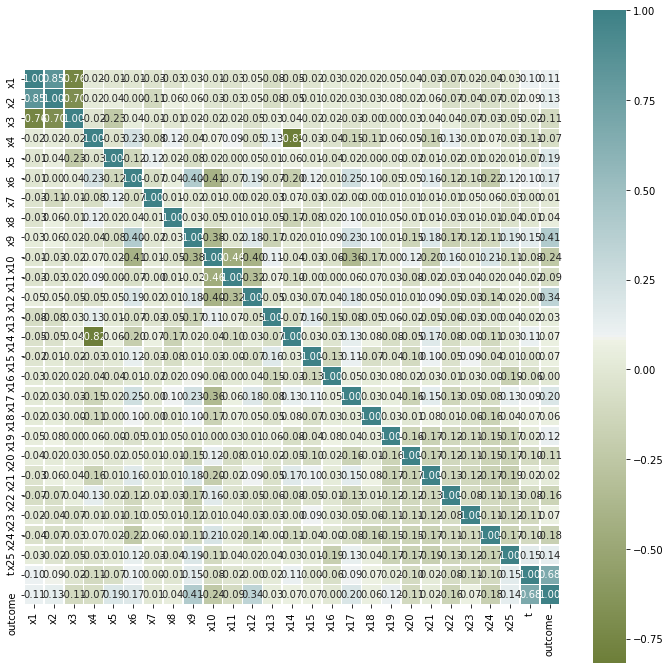

               x1        x2        x3        x4        x5        x6        x7  \
x1       1.000000  0.846630 -0.757812  0.015074 -0.010861 -0.010489 -0.034163   
x2       0.846630  1.000000 -0.695731  0.024849  0.041739  0.004390 -0.114335   
x3      -0.757812 -0.695731  1.000000 -0.020568 -0.231902  0.039525 -0.011155   
x4       0.015074  0.024849 -0.020568  1.000000 -0.033383  0.231131 -0.076387   
x5      -0.010861  0.041739 -0.231902 -0.033383  1.000000 -0.123227  0.123714   
x6      -0.010489  0.004390  0.039525  0.231131 -0.123227  1.000000 -0.074521   
x7      -0.034163 -0.114335 -0.011155 -0.076387  0.123714 -0.074521  1.000000   
x8      -0.033951  0.056900 -0.011716  0.119043  0.024858  0.035357  0.009339   
x9       0.028991  0.064790  0.019947 -0.043540 -0.080634  0.397118 -0.015912   
x10     -0.013896 -0.025622 -0.017234  0.070265  0.016799 -0.412095  0.012116   
x11     -0.030086 -0.025450  0.020458  0.091886  0.003604 -0.065062 -0.001965   
x12      0.048165  0.047837 

In [11]:
df_ihdp_corr=df_ihdp.corr()

f,ax=plt.subplots(figsize=(12,12))

sns.heatmap(df_ihdp_corr, annot=True, linewidths=.5, fmt='.2f', 
            mask= np.zeros_like(df_ihdp_corr,dtype=np.bool), 
            cmap=sns.diverging_palette(100,200,as_cmap=True), 
            square=True, ax=ax)

plt.show()

print(df_ihdp_corr)
print(type(df_ihdp_corr))

# Part 3, 4 and 5.

# Train the Model on the Data Using Gridsearch
# with 10-fold Cross Validation.

In [12]:
# This process can be achieved economically using Sci-kit learn's GridsearchCV().

In [13]:
# Divide DataFrame into X and y.

X = df_ihdp.iloc[:, :-1]
y = df_ihdp.iloc[:, -1]

The data is divided into training-validation/test sets (80%/20%).    \
Note that the training-validation sets are used in training the model.   \
The test set is not used in training. This is good practice.  \
The model is finally run on the test data to hopefully give a better estimate of   \
the true performance of the model.


In [14]:
from sklearn.model_selection import train_test_split

X_train_valid,X_test,y_train_valid,y_test = train_test_split(X,y,shuffle=True, test_size=0.2)
#print(X_train_valid)
#print(y_train_valid)
#print(X_test)
#print(y_test)

Fit a Gradient Boosting Regressor using the training-validation set.   \
10 Fold cross validation is used, and hyperparameter tuning is   \
achieved using sklearn's GridsearchCV() function.

In [15]:
# Gradient Boosting Regressor.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state = 13)

# Hyperparameter tuning...

# Attempt 1.
# parameters = {'max_depth':[2,3,4,5,10,50], 'n_estimators':[ 3, 4,10, 100, 500, 1000], 'learning_rate':[0.05, 0.1, 0.2, 0.3, 1.0, 2.0]}

# Attempt 2.
# parameters = {'max_depth':[2,3,4], 'n_estimators':[100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170], 'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05]}

# Attempt 3.
# parameters = {'max_depth':[2], 'n_estimators':[ 118, 119, 120, 121, 122], 'learning_rate':[0.09, 0.095, 0.100, 0.105, 0.110]}

# Optimum parameters.
parameters = {'max_depth':[2], 'n_estimators':[120], 'learning_rate':[0.09]}

grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_valid, y_train_valid)
 
print('grid_search.best_params_', grid_search.best_params_)
print('grid_search.best_score_', grid_search.best_score_)
print('grid_search.best_estimator', grid_search.best_estimator_)

gradboost_train_valid_mse = - grid_search.best_score_ # Mean square error (mse) is positive.
gradboost_best_model = grid_search.best_estimator_

# Run the best model on the test data.
pred_values_test = gradboost_best_model.predict(X_test)     
gradboost_test_mse = mean_squared_error(y_test, pred_values_test)


grid_search.best_params_ {'learning_rate': 0.09, 'max_depth': 2, 'n_estimators': 120}
grid_search.best_score_ -1.214132113962974
grid_search.best_estimator GradientBoostingRegressor(learning_rate=0.09, max_depth=2, n_estimators=120,
                          random_state=13)


# Summary of Results.

In [16]:
# Mean squared error for Gradient Boost Regressor run on the training/validation data.
print('Training/Validation set Mean Squared Errors.')
print()
print('Gradient boosting regression MSE:', gradboost_train_valid_mse)
print()


# Mean squared error for Gradient Boost Regressor run on the test data.
print('Test set Mean Squared Errors.')
print()
print('Gradient boosting regression MSE:', gradboost_test_mse)

Training/Validation set Mean Squared Errors.

Gradient boosting regression MSE: 1.214132113962974

Test set Mean Squared Errors.

Gradient boosting regression MSE: 1.3343834715633007


Predictions can be made on all the data (as requested in section 2.3 of the Causal Inference Task document).  \
However, note that it is not the best practice to make predictions using data that has been used to train the model   \
in order to evaluate it.

In [17]:
# Use the best model to predict the outcome variable using all the data.

pred_values_all = gradboost_best_model.predict(X)  
gradboost_all_mse = mean_squared_error(y, pred_values_all)

In [18]:
# Mean squared error for Gradient Boost Regressor run on all the data.
print('All data utilised: Mean Squared Errors.')
print()
print('Gradient boosting regression MSE:', gradboost_all_mse)
print()

All data utilised: Mean Squared Errors.

Gradient boosting regression MSE: 0.951204523331886



In [19]:
# Print out the first 10 actual and predicted outcomes.

print('True Outcome,    Predicted Outcome')
for i in range(10):
    print(y[i], pred_values_all[i])

True Outcome,    Predicted Outcome
3.97690870640867 3.9694134851825678
6.45560820453245 5.252514796341222
5.34496957108526 4.350813280764371
7.0243440899245595 6.227455778227536
6.126817093522719 3.908280634367056
2.8811682548633395 3.5320774465375617
2.5488424594555403 3.2259974632349513
4.99198575270767 4.251418026732214
7.4008761489446995 7.976007039752862
5.530923781113559 5.072342650298534


# Part 6.

# Feature importances for Gradient boosting regression.

In [20]:
# Create a sorted list of feature importances.

def non_zero_feature_importances(feature_importances):
    
    indices = np.argsort(feature_importances)[::-1] # Index sort in descending order.

    feature_importances_truncated = []
    feature_variable_names = []

    for i in indices:
        if feature_importances[i] != 0:
            feature_importances_truncated.append(feature_importances[i])
            feature_variable_names.append(df_ihdp.columns[i])
        else:
            break

    #print(feature_importances_truncated)
    #print(feature_variable_names)
    return feature_importances_truncated, feature_variable_names
    
feature_importances = gradboost_best_model.feature_importances_
feature_importances_truncated, feature_variable_names = non_zero_feature_importances(feature_importances)

In [21]:
print(sum(feature_importances)) # Should be 1.

0.9999999999999998


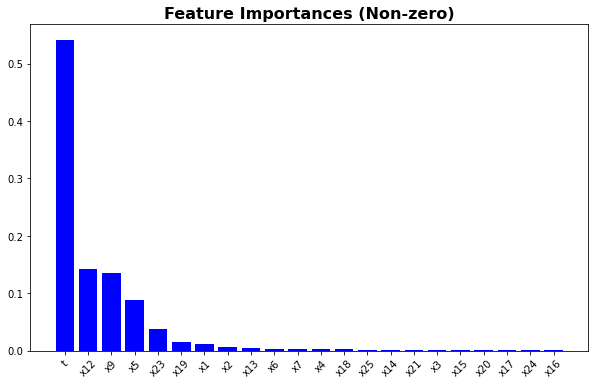

In [22]:
# Plot of the (non zero) Feature Importances.

def plot_feature_importances(feature_importances_truncated, feature_variable_names):
    plt.figure(figsize=(10, 6))

    plt.title("Feature Importances (Non-zero)", fontsize=16, fontweight='bold')

    plt.bar(feature_variable_names, feature_importances_truncated,
           color="b", align="center")
    plt.xticks(rotation=45)

    plt.show()
    
plot_feature_importances(feature_importances_truncated, feature_variable_names)

__Is there a way to make a feature more important?__

In [23]:
# Attempt to make variable t more important.

In [24]:
# Find the predictor variable correlation coefficients with variable t.

t_corrs = df_ihdp_corr.loc[:,'t']
#print(t_corrs)

# Delete data relating to variable t and outcome.
t_corrs.drop(labels =['t','outcome'], inplace=True)
#print(t_corrs)

Choose each one of the predictor variables (excluding t, and the ones that have zero importance) in turn and    \
set it to a constant. This makes the variable effectively redundant, and its effect on the importance of t    \
can be determined.   

In [25]:
feature_variable_names_copy = feature_variable_names.copy()
feature_importances_truncated_copy = feature_importances_truncated.copy() 

old_t_importance = feature_importances_truncated[0]

t_importances = []
t_imp_diff = []

selection = len(feature_variable_names)

for i in range(1, selection):
    var_name = feature_variable_names_copy[i]    

    # Set var_name to a constant (0).
    X_drop_var = X_train_valid.copy()
    X_drop_var[var_name] = 0

    # Fit regressor.
    gradboost_best_model.fit(X_drop_var, y_train_valid)
    feature_importances = gradboost_best_model.feature_importances_
    feature_importances_truncated, feature_variable_names = non_zero_feature_importances(feature_importances)
    
    # Search for the position in feature_variable_names where variable t is present.
    j = feature_variable_names.index('t') 
    # print('j=',j)
    t_importances.append(feature_importances_truncated[j])
    t_imp_diff.append(feature_importances_truncated[j]-old_t_importance)
    
df_importance_results = pd.DataFrame()

df_importance_results['Dropped Variable']=[feature_variable_names_copy[i] for i in range(1, selection)]
df_importance_results['Variable Imp']=[feature_importances_truncated_copy[i] for i in range(1, selection)]
df_importance_results['Corr with t']=[t_corrs[feature_variable_names_copy[i]] for i in range(1, selection)]
df_importance_results['New t Imp']= t_importances
df_importance_results['t Imp Diff']= t_imp_diff
    
print()
print(f"Old t importance {old_t_importance:.6f}")
print()
# Print data frame. Note variables are in descending order of importance.
print(df_importance_results.head(10))  
print()
# Print data frame. Note that sorting is in descending order of new t importance.
print(df_importance_results.sort_values(by='New t Imp', ascending=False).head(10))


Old t importance 0.541292

  Dropped Variable  Variable Imp  Corr with t  New t Imp  t Imp Diff
0              x12      0.142896    -0.004294   0.565123    0.023831
1               x9      0.134967     0.148839   0.594741    0.053449
2               x5      0.087583    -0.067987   0.564897    0.023605
3              x23      0.037960    -0.108456   0.555696    0.014404
4              x19      0.014138     0.022193   0.546434    0.005142
5               x1      0.010916     0.100514   0.543802    0.002510
6               x2      0.006644     0.087451   0.542874    0.001582
7              x13      0.003963     0.022456   0.542973    0.001681
8               x6      0.003167     0.101511   0.542568    0.001275
9               x7      0.003141     0.003759   0.542200    0.000908

   Dropped Variable  Variable Imp  Corr with t  New t Imp  t Imp Diff
1                x9      0.134967     0.148839   0.594741    0.053449
0               x12      0.142896    -0.004294   0.565123    0.023831
2 

It can be seen from the second table that the amount by which the importance of t is increased   \
depends upon the importance of the variable that was effectively made redundant, and also  \
the magnitude of the correlation coefficient between t and that variable.   \
Note that although x12 has the greatest importance of all the variables (excluding t), it has   \
a smaller effect on the change in the importance of t than x9 does, which has less importance but is more   \
highly correlated with t.



# Part 7.

# Inverse Propensity Score Weighting.

In [26]:
# Use Logistic Regression for the Classification Problem.

In [27]:
new_X_train_valid = X_train_valid.iloc[:, :-1] # Variables x1 to x25.
new_y_train_valid = X_train_valid.iloc[:, -1]  # Variable t.
new_X_test = X_test.iloc[:, :-1] # Variables x1 to x25.
new_y_test = X_test.iloc[:, -1]  # Variable t.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

model = LogisticRegression()
parameters = {}

grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=10, scoring='accuracy')
grid_search.fit(new_X_train_valid, new_y_train_valid)
 
print('grid_search.best_params_', grid_search.best_params_)
print('grid_search.best_score_', grid_search.best_score_)
print('grid_search.best_estimator', grid_search.best_estimator_)

logreg_train_valid_acc = + grid_search.best_score_ # Accuracy.
logreg_best_model = grid_search.best_estimator_

# Run the best model on the test data.
pred_values = grid_search.best_estimator_.predict(new_X_test)     
logreg_test_acc = accuracy_score(new_y_test, pred_values)

grid_search.best_params_ {}
grid_search.best_score_ 0.8024293785310735
grid_search.best_estimator LogisticRegression()


In [28]:
# Mean squared error for the Logistic Regression algorithm run on the training/validation data.
print('Training/Validation set Accuracy.')
print()
print('Logistic regression:', logreg_train_valid_acc)
print()

# Mean squared error for the Logistic Regression algorithm run on the test data.
print('Test set Accuracy.')
print()
print('Logistic regression:', logreg_test_acc)
print()

Training/Validation set Accuracy.

Logistic regression: 0.8024293785310735

Test set Accuracy.

Logistic regression: 0.7733333333333333



In [29]:
# Print the list of class labels known to the classifier.
grid_search.classes_

array([0, 1])

Class 0 is at index position 0, and class 1 is at index position 1.

In [30]:
# Calculate the propensity scores.

In [31]:
# Calculate the probabilities and predictions on the initial data.

X_drop_t = X.iloc[:, :-1]
t = X.iloc[:, -1]

#print(X_drop_t.head())
#print(t.head())

probabilities = grid_search.predict_proba(X_drop_t)
pred_values = grid_search.predict(X_drop_t)

#print(type(probabilities))

#for i in range(20):
#    print('index:', i, ' p0, p1:', probabilities[i,0],  probabilities[i,1])

#for i in range(20):
#    print('index:', i, ' true values, pred values:', t[i], pred_values[i])

In [32]:
# Calculate the Inverse Propensity Score Weighting (IPSW).
# sample_weights calculated according to the formula provided in section 2.7 of the Causal Inference Task document.

def calculate_IPSW(t, probabilities):
    sample_weights = []
    for i in range(len(t)):
        sample_weights.append(1/probabilities[i, t[i]])
    return sample_weights

sample_weights = calculate_IPSW(t, probabilities)
    
#for i in range(20):
#    print('index:', i, 'sample_weights:', sample_weights[i])   

In [33]:
# Calculate the average treatment effect (ATE). (With all sample weights = 1).

def calculate_ATE(model, X_drop_t):
    
    N = X_drop_t.shape[0] # Number of rows.
    list_0 = [0]*N # List with elements of value 0.
    list_1 = [1]*N # List with elements of value 1.
    series_0 = pd.Series(list_0) # Series with elements of value 0.
    series_1 = pd.Series(list_1) # Series with elements of value 1.
   
    X_appended_0 = X_drop_t.copy()
    X_appended_0['t'] = series_0 # Append series_0.
    X_appended_1 = X_drop_t.copy()
    X_appended_1['t'] = series_1 # Append series_1.
    
    y_0 = model.predict(X_appended_0)
    y_1 = model.predict(X_appended_1)
       
    ATE = (sum(y_1)-sum(y_0))/N   
    return ATE

In [34]:
# Use Gradient Booster Regressor with all sample weights = 1.

gradboost_best_model.fit(X, y)

ATE = calculate_ATE(gradboost_best_model, X_drop_t)
ATE_before = ATE

print('ATE, using uniform sample weights:', ATE)

ATE, using uniform sample weights: 3.875212798611807


In [35]:
# Non zero Feature importances for Gradient boosting regression with allsample weights = 1.
    
feature_importances = gradboost_best_model.feature_importances_
feature_importances_truncated, feature_variable_names = non_zero_feature_importances(feature_importances)

In [36]:
t_before = feature_importances_truncated[0]
print(t_before)

0.5673568381747496


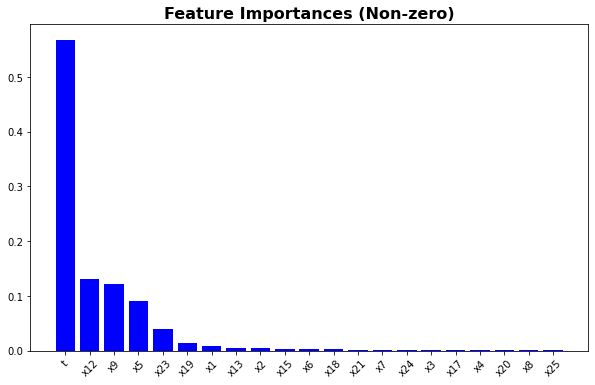

In [37]:
# Plot of the (non zero) Feature Importances.

plot_feature_importances(feature_importances_truncated, feature_variable_names)

In [38]:
# Create a new Gradient Booster Regressor with the sample weights.

gradboost_best_model.fit(X, y, sample_weights)

ATE = calculate_ATE(gradboost_best_model, X_drop_t)
ATE_after = ATE

print('ATE, using varying sample weights:', ATE)

ATE, using varying sample weights: 3.991576245280326


In [39]:
# Non zero Feature importances for Gradient boosting regression with sample weights.
    
feature_importances = gradboost_best_model.feature_importances_
feature_importances_truncated, feature_variable_names = non_zero_feature_importances(feature_importances)

In [40]:
t_after = feature_importances_truncated[0]
print(t_after)

0.7593986457440504


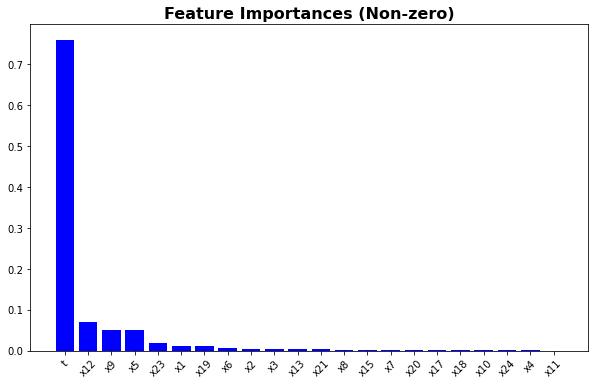

In [41]:
# Plot of the (non zero) Feature Importances.

plot_feature_importances(feature_importances_truncated, feature_variable_names)

In [42]:
print('ATE unweighted,   ATE weighted')
print(ATE_before, ATE_after)

ATE unweighted,   ATE weighted
3.875212798611807 3.991576245280326


In [43]:
print('t importance unweighted, t importance weighted')
print(t_before, '     ', t_after)

t importance unweighted, t importance weighted
0.5673568381747496       0.7593986457440504


Notice that the average treatment effect (ATE) is estimated to be larger for the weighted as opposed to   \
unweighted samples.  \
Also the importance in variable t has increased substantially after weighting adjustment. 

The cognitive test score of a child (outcome) will depend on whether high quality child care and    \
home visits (t) occured, and also on all the other factors such as child-birth weight, sex, birth order etc   \
(x1, x2, ..., x25).   \
The idea behind using a weighting is to try to separate out the effect of the treatment (t) on the   \
cognitive test score (outcome) in order to give a more accurate estimation of the effectiveness of a treatment.

 

Other methods for dealing with the problem are:-   
1. Regression adjustment.
2. Propensity score matching.
3. Nearest neighbour matching.  